In [169]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

In [170]:
#setting up salary data
sal=pd.concat([pd.read_csv(f"salaries/p_{yr}.csv") for yr in range(2018,2010,-1)])
sal=sal.groupby("name").first()

,title,salary,benefits
name,,,
A. Tupling,Professor,180567.92,519.72
A.Russell Tupling,Professor,166933.16,578.96
Abigail Scholer,Associate Professor,132597.73,373.00
Achim Kempf,Professor,187834.44,395.88
Ada Barlatt,Assistant Professor,102159.48,359.08


In [245]:
#Setting up dataframes
eval_data = pd.read_csv("averages_enrol.csv")
eval_data[["term"]]=pd.Categorical(eval_data.term)
eval_data[["section"]]=pd.Categorical(eval_data.section)
#eval_data["response_rate"] = eval_data.num_responses / eval_data.enrolled
#df.replace([np.inf, -np.inf], np.nan)

df=eval_data[eval_data.num_responses>10] # only surveys with >10 responses
df=df.groupby("instructor").filter(lambda x:len(x)>2) # only teachers with >=3 classes
df=pd.merge(df,sal,how='left', left_on=["instructor"],right_on=['name']).drop(['benefits',"section"],axis=1)
df.title.replace(np.nan,"Lecturer",inplace=True)

,term,ccode,instructor,organization,expl_lvl,q_treatment,visual,oral,help,interesting,...,printed_notes,textbook,new_material,assign_amount,hours_outside,num_responses,enrolled,response_rate,title,salary
0,1131,['ACTSC 232'],James Adcock,1.360825,2.804124,1.453608,1.567010,1.268041,2.000000,1.641304,...,1.516129,1.865169,2.659794,2.927835,2.000000,97,143,0.678322,Lecturer,136295.28
1,1131,['ACTSC 371'],Brent Matheson,2.221053,2.821053,2.000000,2.452632,2.242105,2.565217,2.070588,...,1.909091,2.271429,2.851064,3.021277,1.903226,95,236,0.402542,Lecturer,128478.60
2,1131,['ACTSC 372'],Peter Wood,1.435644,2.623762,1.400000,1.574257,1.386139,1.712121,1.590000,...,1.785714,2.103896,2.762376,2.891089,1.930000,101,174,0.580460,Lecturer,162561.88
3,1131,"['ACTSC 433', 'ACTSC 833']",Jun Cai,1.723077,2.859375,2.262295,1.923077,2.476923,2.352941,1.833333,...,1.578947,2.166667,2.907692,2.707692,1.968750,65,107,0.607477,Professor,161277.18
4,1131,"['ACTSC 446', 'ACTSC 846']",Ruodo Wang,2.308411,2.557692,1.990566,2.644860,2.679245,2.000000,2.031250,...,1.819444,2.370968,2.538462,2.844660,2.038095,107,178,0.601124,Associate Professor,141182.60
5,1131,"['ACTSC 462', 'ACTSC 862']",Scott Lennox,1.575342,2.780822,1.785714,1.849315,1.657534,2.333333,1.900000,...,1.672414,1.717391,2.869565,3.169492,1.671233,73,111,0.657658,Lecturer,NaN
6,1131,['AMATH 231'],Conrad Hewitt,1.489796,2.816327,1.632653,1.795918,1.448980,1.260870,1.734694,...,1.604167,1.666667,2.918367,2.918367,2.395833,49,72,0.680556,Associate Professor,177566.16
7,1131,"['AMATH 242', 'CS 371']",Lucian Ivan,2.341463,2.775000,2.128205,2.650000,2.435897,2.055556,2.307692,...,1.615385,2.000000,2.692308,2.609756,2.487805,41,72,0.569444,Lecturer,NaN
8,1131,['AMATH 250'],Joe West,1.234234,2.909910,1.372727,1.306306,1.180180,1.767123,1.798077,...,1.922222,1.965517,2.909910,2.639640,2.082569,111,197,0.563452,Lecturer,124268.84
9,1131,"['AMATH 331', 'PMATH 331']",Lilia Krivodonova,2.176471,2.606061,2.029412,2.352941,2.470588,2.062500,2.242424,...,2.142857,2.333333,2.735294,2.882353,2.147059,34,52,0.653846,Associate Professor,152063.68


In [246]:
df_tenure=df.groupby("instructor").mean()
df_tenure["num_taught"]=df.groupby("instructor").size()
df_tenure["title"]=df.groupby("instructor").first()[["title"]]
has_tenure=df_tenure.title.isin(["Professor","Associate Professor"])

,organization,expl_lvl,q_treatment,visual,oral,help,interesting,overall,attendance,assign_helpful,...,textbook,new_material,assign_amount,hours_outside,num_responses,enrolled,response_rate,salary,num_taught,title
instructor,,,,,,,,,,,,,,,,,,,,,
Adam Kolkiewicz,1.691446,2.429451,1.510890,1.950600,1.885041,1.362193,1.635859,1.561237,1.243845,1.470170,...,1.550505,2.583002,2.639731,2.495896,29.00,72.333333,0.446812,175958.2,3,Associate Professor
Adam Roegiest,1.862390,2.794451,1.832141,2.112739,1.795893,2.033704,1.717994,1.856250,1.278992,1.531858,...,2.391384,2.577641,2.122081,3.652393,51.75,90.500000,0.583992,NaN,4,Lecturer
Adriel Dean-Hall,2.314286,3.033968,2.013506,2.449048,2.227879,2.418803,1.849768,2.234791,1.599206,1.598413,...,2.055556,2.777233,2.349206,3.241270,25.00,69.333333,0.359124,NaN,3,Lecturer
Ahmad Alrefai,3.056345,3.086275,2.738697,3.266667,3.419231,1.827778,1.891059,3.225774,1.857143,1.709017,...,2.236467,2.333333,2.300389,3.327778,32.00,53.000000,0.558923,NaN,3,Lecturer
Ahmed Ayaz Ataullah,2.038713,2.891438,1.781366,2.207169,2.030823,2.069040,2.168041,1.939435,1.687095,1.855265,...,2.356944,2.887103,2.975629,1.891201,51.00,98.166667,0.525865,NaN,6,Lecturer


['organization', 'expl_lvl', 'q_treatment', 'visual', 'oral', 'help', 'interesting', 'overall', 'attendance', 'assign_helpful', 'printed_notes', 'textbook', 'new_material', 'assign_amount', 'hours_outside', 'num_responses', 'enrolled', 'response_rate', 'num_taught']


# Classifiers
The data was fit onto many different classifiers to take a look at how the classifiers performed and also look at the how the underlying data affects different classifiers. In this project, the classification is a component of the analysis, not the final product of the analysis. 

Classifiers were not picked due to any pattern, but follow the ones introduced in Stat 441. We start with K-Nearest Neighbours, a support vector machine classifier, several tree and boosting methods (Decision tree, Random Forest, Adaboost, XGBoost), followed by some more basic classifiers (Naive Bayes, LDA, QDA, and Logistic Regression)

For a select set of the classifiers (SVC,Random Forest, Decision Tree, XGBoost) 5-fold cross validation grid/random search was used to tune the hyperparameters. The others were left as is using certain default methods as they have relatively few parameters.

Grid search was used to tune the SVC due to the different number of parameters depending on kernel, and random search for the rest. 

In [248]:
#grid search for parameter selection of certain estimators
## SVC grid search
param_grid_SVC = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
 ]

SVC_clf = GridSearchCV(SVC(), param_grid_SVC, cv=5,iid=False)

#RF
param_grid_RF =  {'bootstrap': [True, False],
 'max_depth':[10,20,30,40,50],
 'max_features':['auto',None],
 'min_samples_leaf': [1,2,3],
 'min_samples_split': [2,5,10],
 'n_estimators': [200,400,800,1000]}

RF_clf = RandomizedSearchCV(RandomForestClassifier(),param_grid_RF,cv=5,iid=False)

param_grid_DT =  {'criterion': ['gini','entropy'],
  'splitter': ['best','random'],
 'max_depth': [10,20,30,40,50],
 'max_features': ['auto'],
 'min_samples_leaf': [2],
 'min_samples_split': [3]}

DT_clf = RandomizedSearchCV(DecisionTreeClassifier(),param_grid_DT,cv=5,iid=False)

param_grid_xgb = {
    'colsample_bytree': [0.3,0.4,0.5,0.6,0.7,0.8],
    'gamma': [0,1,5],
    'learning_rate': [0.1, 0.05, 0.01],
    'maxdepth': [3],
    'n_estimators': [500]
}

XGB_clf = RandomizedSearchCV(xgb.XGBClassifier(),param_grid_xgb,cv=5,iid=False)


In [ ]:
#preparing feats
feats=list(df_tenure.select_dtypes('number').columns)
feats.remove("salary")

#scale data
#standardize the data
X= df_tenure
X=StandardScaler().fit_transform(X[feats])

print(feats)

#set up of names and classifiers 
names = ["Nearest Neighbors", "SVM tuned",
         "Decision Tree", "Random Forest","AdaBoost","XGB",
         "Naive Bayes","LDA","QDA","LogReg"]

classifiers = [
    
    KNeighborsClassifier(10),
    SVC_clf,
    DT_clf,
    RF_clf,
    AdaBoostClassifier(),
    XGB_clf,
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(solver='liblinear')]

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X,has_tenure,test_size=0.3,random_state=42)

output = pd.DataFrame(index = ['train_error', 'base_line_train', 'test_error','base_line_test', 'score']) 

for name,classifier in zip(names,classifiers):
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test,y_test)
    train_err = np.mean(classifier.predict(X_train)!=y_train)
    test_err = np.mean(classifier.predict(X_test)!=y_test)
    baseline_train = np.mean(y_train)
    baseline_test = np.mean(y_test)
    output_l = [train_err, baseline_train, test_err,baseline_test, score]
    output[f"{name}"] = output_l
#     print(f"train error: {np.mean(clf.predict(X_train)!=y_train)}")
#     print(f"test error:  {np.mean(clf.predict(X_test)!=y_test)}")
#     print(f"baseline:    {np.mean(has_tenure)}")
#print(output_l)
print(output)




                 Nearest Neighbors  SVM tuned  Decision Tree  Random Forest  \
train_error               0.247967   0.227642       0.044715       0.000000   
base_line_train           0.406504   0.406504       0.406504       0.406504   
test_error                0.311321   0.245283       0.349057       0.264151   
base_line_test            0.462264   0.462264       0.462264       0.462264   
score                     0.688679   0.754717       0.650943       0.735849   

                 AdaBoost       XGB  Naive Bayes       LDA       QDA    LogReg  
train_error      0.093496  0.060976     0.264228  0.227642  0.207317  0.227642  
base_line_train  0.406504  0.406504     0.406504  0.406504  0.406504  0.406504  
test_error       0.273585  0.235849     0.273585  0.254717  0.301887  0.254717  
base_line_test   0.462264  0.462264     0.462264  0.462264  0.462264  0.462264  
score            0.726415  0.764151     0.726415  0.745283  0.698113  0.745283  


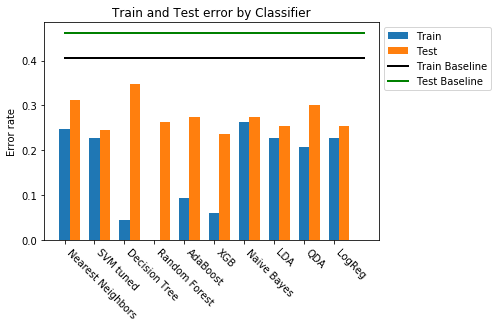

In [305]:
ind = np.arange(10)
p1 = plt.bar(ind,output.transpose().train_error,width=0.35)
p2 = plt.bar(ind+0.35,output.transpose().test_error,width=0.35)
l1 = plt.plot([0,10], [0.406504, 0.406504], 'k-', lw=2)
l2 = plt.plot([0,10], [0.462264, 0.462264], 'g-', lw=2)
plt.xticks(ind,output.columns,rotation=-45,ha="left")
plt.ylabel('Error rate')
plt.title('Train and Test error by Classifier')
plt.legend((p1[0], p2[0],l1[0],l2[0]), ('Train', 'Test','Train Baseline','Test Baseline'),loc = "upper left",bbox_to_anchor=[1,1])

In [ ]:
from sklearn.decomposition import PCA
X= df_tenure
X=StandardScaler().fit_transform(X[feats])
X = PCA(.95).fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,has_tenure,test_size=0.3,random_state=42)

output_PCA = pd.DataFrame(index = ['train_error', 'test_error', 'base_line_train','base_line_test', 'score']) 

for name,classifier in zip(names,classifiers):
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test,y_test)
    train_err = np.mean(classifier.predict(X_train)!=y_train)
    test_err = np.mean(classifier.predict(X_test)!=y_test)
    baseline_train = np.mean(y_train)
    baseline_test = np.mean(y_test)
    output_l = [train_err, test_err, baseline_train,baseline_test, score]
    output_PCA[f"{name}"] = output_l
#     print(f"train error: {np.mean(clf.predict(X_train)!=y_train)}")
#     print(f"test error:  {np.mean(clf.predict(X_test)!=y_test)}")
#     print(f"baseline:    {np.mean(has_tenure)}")
#print(output_l)
print(output_PCA)

In [ ]:
ind = np.arange(10)
p1 = plt.bar(ind,output_PCA.transpose().train_error,width=0.35)
p2 = plt.bar(ind+0.35,output_PCA.transpose().test_error,width=0.35)
l1 = plt.plot([0,10], [0.406504, 0.406504], 'k-', lw=2)
l2 = plt.plot([0,10], [0.462264, 0.462264], 'g-', lw=2)
plt.xticks(ind,output_PCA.columns,rotation=-45,ha="left")
plt.ylabel('Error rate')
plt.title('Train and Test error by Classifier after PCA')
plt.legend((p1[0], p2[0],l1[0],l2[0]), ('Train', 'Test','Train Baseline','Test Baseline'),loc = "upper left",bbox_to_anchor=[1,1])